# Đề kiểm tra lập trình nhập môn phân tích dữ liệu và học sâu

### Sinh viên không được phép sử dụng internet
### Sinh viên sau khi làm bài xong xuất ra file PDF đồng thời nộp lên Fit-lab và push lên git-hub
### Sinh viên làm bắt đầu làm bài từ 15h40 - 18h00

In [75]:
# Họ và Tên: Nguyễn Trọng Nghĩa
# MSSV: 207ct40473

In [76]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [77]:
#Bước 1: Load data
def load_dataset():
    X, y = load_iris(return_X_y=True)
    X = X[y!=2]
    y = y[y!=2]
    return X,y
#Điền ở đây
    X,y = load_dataset()
    print(x.shape, y.shape)

Kết quả: (100, 4) (100,)

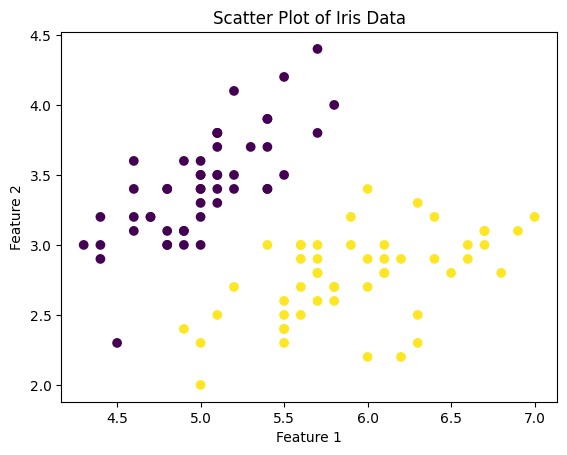

In [94]:
#Trực quan hóa dữ liệu data
#Điền code ở đây
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Iris Data')
plt.show()

Kết quả

![image.png](attachment:image.png)

In [90]:
# Bước 2: Định nghĩa mô hình hồi quy logistic bằng PyTorch
class LogisticRegressTorch(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegressTorch, self).__init__()
        self.linear = nn.Linear(n_features, 1)                 # tạo một lớp tuyến tính (nn.Linear) với n_features đầu vào và 1 đầu ra

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [80]:
# Bước 3: Định nghĩa lớp dữ liệu
class IrisTorch(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return  len(self.X)#Điền ở đây theo comment            #trả về số lượng mẫu trong tập dữ liệu (số lượng hàng trong self.X)

    def __getitem__(self, idx):
        return  self.X[idx], self.y[idx]#Điền ở đây theo comment            #trả về một cặp đặc trưng và nhãn tương ứng với chỉ số idx

In [81]:
# Tạo dữ liệu
dataset = IrisTorch(X, y)

In [88]:
# Bước 4: Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra bằng cách chia ngẫu nhiên 70,30.
train_size =int(0.7 * len(dataset))                                               #70%
test_size =len(dataset) - train_size                                                #30%
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [87]:
# Tạo DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [86]:
# Bước 5: Định nghĩa criterion và optimizer
n_features = X.shape[1]

model = nn.Sequential(
    nn.Linear(n_features, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [91]:
n_epochs = 200
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Evaluation on test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item() * inputs.size(0)

            predicted = (outputs >= 0.5).float()  # Binary classification thresholding
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    accuracy = correct / total
    test_accuracies.append(accuracy)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/200, Train Loss: 0.7400, Test Loss: 0.6470, Test Accuracy: 0.5667
Epoch 2/200, Train Loss: 0.6638, Test Loss: 0.6196, Test Accuracy: 0.5667
Epoch 3/200, Train Loss: 0.6184, Test Loss: 0.6002, Test Accuracy: 0.5667
Epoch 4/200, Train Loss: 0.5827, Test Loss: 0.5836, Test Accuracy: 0.9333
Epoch 5/200, Train Loss: 0.5551, Test Loss: 0.5644, Test Accuracy: 0.9667
Epoch 6/200, Train Loss: 0.5284, Test Loss: 0.5392, Test Accuracy: 0.9667
Epoch 7/200, Train Loss: 0.5020, Test Loss: 0.5125, Test Accuracy: 0.9667
Epoch 8/200, Train Loss: 0.4753, Test Loss: 0.4832, Test Accuracy: 0.9667
Epoch 9/200, Train Loss: 0.4486, Test Loss: 0.4524, Test Accuracy: 0.9667
Epoch 10/200, Train Loss: 0.4251, Test Loss: 0.4243, Test Accuracy: 0.9667
Epoch 11/200, Train Loss: 0.4046, Test Loss: 0.3988, Test Accuracy: 0.9667
Epoch 12/200, Train Loss: 0.3858, Test Loss: 0.3739, Test Accuracy: 0.9667
Epoch 13/200, Train Loss: 0.3634, Test Loss: 0.3481, Test Accuracy: 0.9667
Epoch 14/200, Train Loss: 0.3349, 

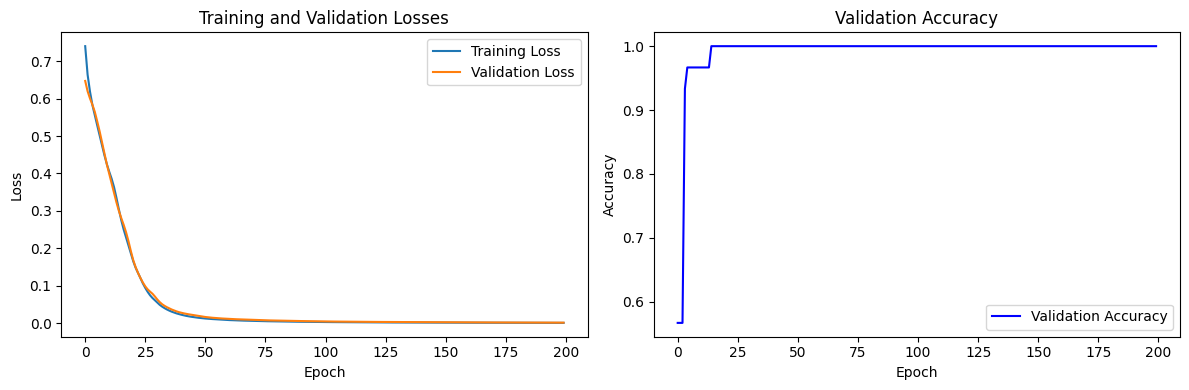

In [93]:
# Vẽ biểu đồ loss và accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Validation Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#Kết quả:

![image.png](attachment:image.png)